In [1]:
import sys
sys.path.append("../../src/")

import uncertainpy.gradual as grad  

# Stock example

In [2]:
# Define your model
model = grad.semantics.QuadraticEnergyModel()
print(model)
# Set an approximator
model.approximator = grad.algorithms.RK4(model)
# Set the BAG
model.BAG = grad.BAG("../../bags/stock_example.bag")

model.solve(delta=10e-2, epsilon=10e-4, verbose=True, generate_plot=False)

uncertainpy.gradual.semantics.ContinuousModularModel - BAG: None, Approximator: None, Argument strength: {})
QuadraticEnergyModel, RK4
Time: 8.399999999999986
Arg(Buy):0.5->0.821
Arg(Sell):0.5->0.363
Arg(1):0.8->0.205
Arg(2):0.7->0.805
Arg(3):0.3->0.166
Arg(4):0.9->0.9
Arg(5):0.9->0.9



0.0009849389836143567

# Acyclic BAGs

For acyclic BAGs, strength values can be computed more efficiently using methods from the Acyclic module

In [3]:
# Iterative computation
model = grad.semantics.ContinuousModularModel(grad.semantics.modular.ProductAggregation(), 
                                              grad.semantics.modular.LinearInfluence(conservativeness=1))
model.BAG = grad.BAG("../../bags/RagoEtAlEDemocracy.bag")
model.approximator = grad.algorithms.RK4(model)

model.solve(delta=10e-2, epsilon=10e-4, verbose=False, generate_plot=False)

for arg in model.BAG.arguments.values():
    print(arg)

Arg(A1):0.5->0.862
Arg(A2):0.5->0.849
Arg(P1):0.7->0.7
Arg(P2):0.5->0.081
Arg(P3):0.9->0.9
Arg(C1):0.2->0.2
Arg(C2):0.2->0.2
Arg(C3):0.6->0.6
Arg(C4):0.5->0.5


In [4]:
# Computation via Forward Propagation
bag = grad.BAG("../../bags/RagoEtAlEDemocracy.bag")

agg_f = grad.semantics.modular.ProductAggregation()
inf_f = grad.semantics.modular.LinearInfluence(conservativeness=1)

#returns dictionary of strength values if needed
strength_values = grad.algorithms.computeStrengthValues(bag, agg_f, inf_f)

for arg in bag.arguments.values():
    print(arg)

Arg(A1):0.5->0.862
Arg(A2):0.5->0.85
Arg(P1):0.7->0.7
Arg(P2):0.5->0.08
Arg(P3):0.9->0.9
Arg(C1):0.2->0.2
Arg(C2):0.2->0.2
Arg(C3):0.6->0.6
Arg(C4):0.5->0.5


In [5]:
# if BAG contains cycles, algorithm is not applicable
bag = grad.BAG("../../bags/stock_example.bag")

agg_f = grad.semantics.modular.ProductAggregation()
inf_f = grad.semantics.modular.LinearInfluence(conservativeness=1)

#returns dictionary of strength values if needed
strength_values = grad.algorithms.computeStrengthValues(bag, agg_f, inf_f)
print(strength_values)

Graph contains cycles. Found partial topological order ['4', '5', 'Att(Arg(Buy):0.5->0.5,Arg(Sell):0.5->0.5)', 'Att(Arg(Sell):0.5->0.5,Arg(Buy):0.5->0.5)', 'Sup(Arg(1):0.8->0.8,Arg(Sell):0.5->0.5)', 'Sup(Arg(2):0.7->0.7,Arg(Buy):0.5->0.5)', 'Att(Arg(2):0.7->0.7,Arg(1):0.8->0.8)', 'Att(Arg(3):0.3->0.3,Arg(2):0.7->0.7)', 'Att(Arg(4):0.9->0.9,Arg(3):0.3->0.3)', 'Sup(Arg(4):0.9->0.9,Arg(2):0.7->0.7)', 'Att(Arg(5):0.9->0.9,Arg(1):0.8->0.8)', 'Sup(Arg(5):0.9->0.9,Arg(Buy):0.5->0.5)', '3', '2', '1'].
None


# Stock example (with graph)

<module 'matplotlib.pyplot' from 'c:\\Users\\nicop\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

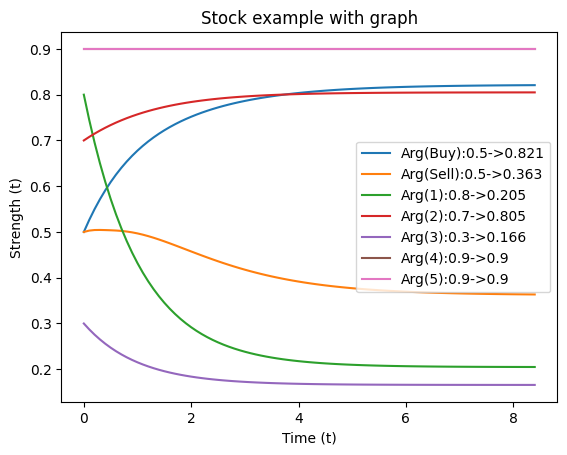

In [6]:
#from uncertainpy.argumentation.graphing import graph

model = grad.semantics.QuadraticEnergyModel()
model.approximator = grad.algorithms.RK4(model)
model.BAG = grad.BAG("../../bags/stock_example.bag")

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
grad.plotting.strengthplot(model, DELTA, EPSILON, "Stock example with graph")

# Stock example comparison

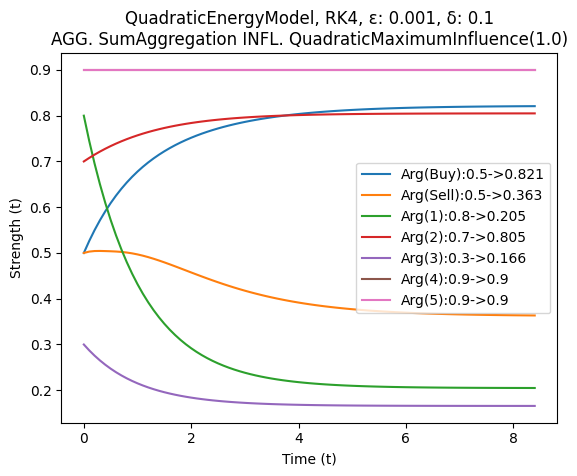

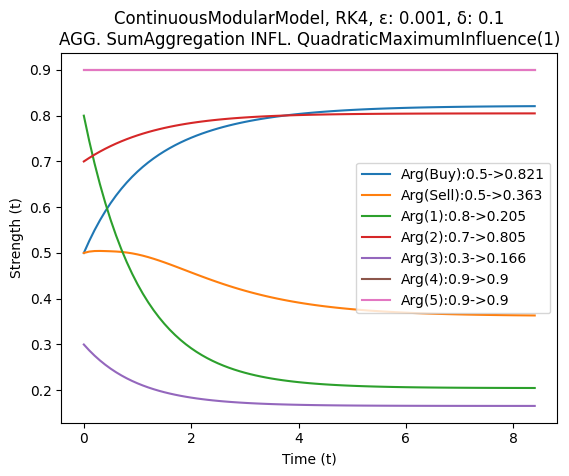

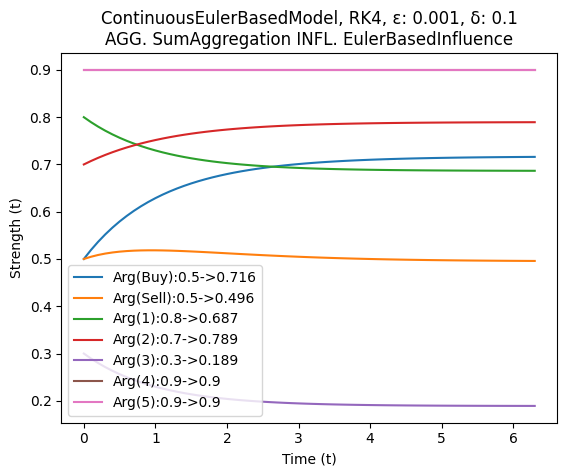

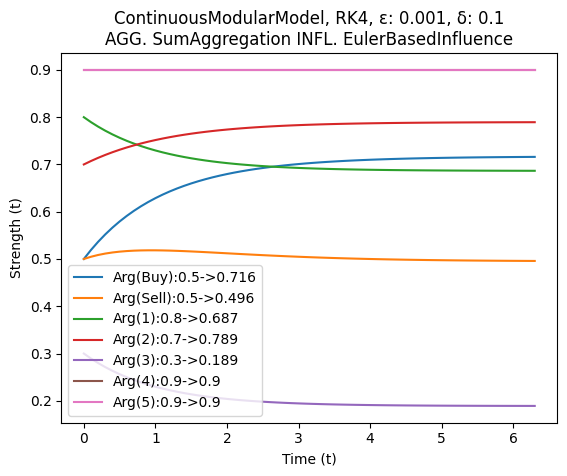

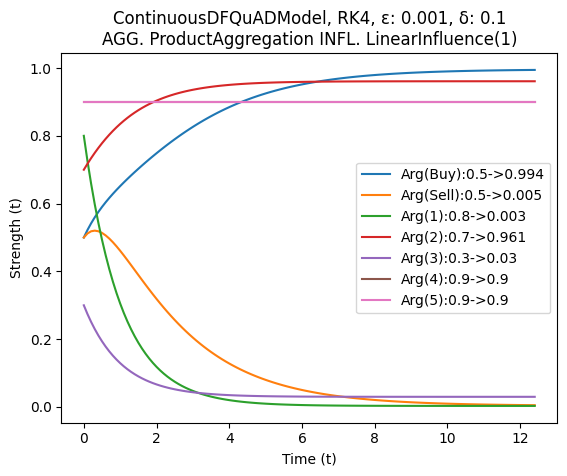

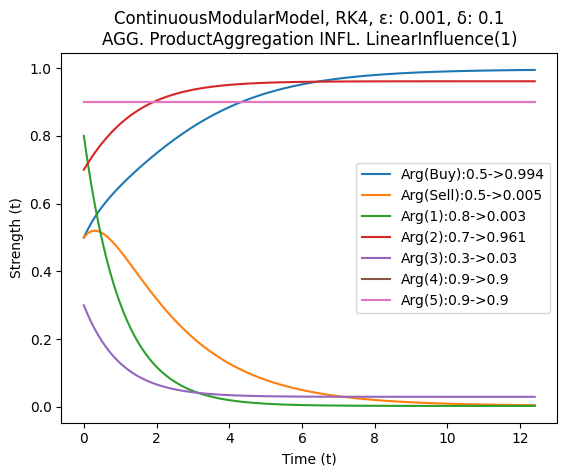

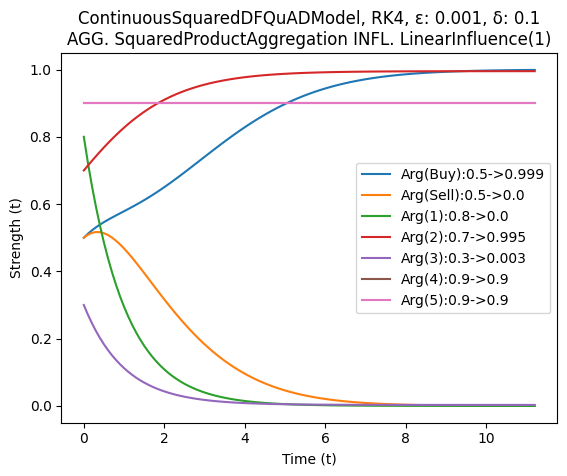

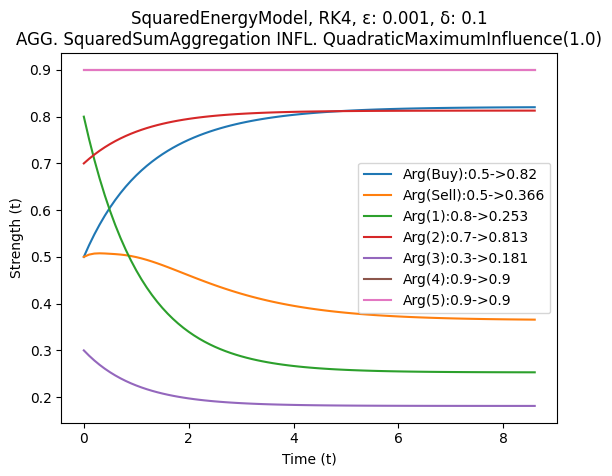

In [7]:
DELTA = 10e-2
EPSILON = 10e-4

models = []
plots = []

models.append(grad.semantics.QuadraticEnergyModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.SumAggregation(), grad.semantics.modular.QuadraticMaximumInfluence(conservativeness=1)))
models.append(grad.semantics.ContinuousEulerBasedModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.SumAggregation(), grad.semantics.modular.EulerBasedInfluence()))
models.append(grad.semantics.ContinuousDFQuADModel())
models.append(grad.semantics.ContinuousModularModel(grad.semantics.modular.ProductAggregation(), grad.semantics.modular.LinearInfluence(conservativeness=1)))
models.append(grad.semantics.ContinuousSquaredDFQuADModel())
models.append(grad.semantics.SquaredEnergyModel())

for model in models:
    BAG = grad.BAG("../../bags/stock_example.bag")
    BAG.reset_strength_values()
    model.approximator = grad.algorithms.RK4(model)
    model.BAG = BAG

    result = model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
    title = f"{model.name}, {model.approximator}, ε: {EPSILON}, δ: {DELTA}"
    if model.aggregation is not None:
        title += f"\nAGG. {model.aggregation}"
    if model.influence is not None:
        title += f" INFL. {model.influence}"

    plots.append(grad.plotting.strengthplot(model, DELTA, EPSILON, title))

for plot in plots:
    plot.show()


# Cycles 

QuadraticEnergyModel, RK4
Time: 36.00000000000024
Arg(A):1->0.225
Arg(B0):0->0.048
Arg(C0):0->0.185
Arg(C1):0->0.185
Arg(C2):0->0.185
Arg(C3):0->0.185
Arg(C4):0->0.185
Arg(C5):0->0.185
Arg(C6):0->0.185
Arg(C7):0->0.185
Arg(C8):0->0.185
Arg(C9):0->0.185
Arg(B1):0->0.048
Arg(B2):0->0.048
Arg(B3):0->0.048
Arg(B4):0->0.048
Arg(B5):0->0.048
Arg(B6):0->0.048
Arg(B7):0->0.048
Arg(B8):0->0.048
Arg(B9):0->0.048



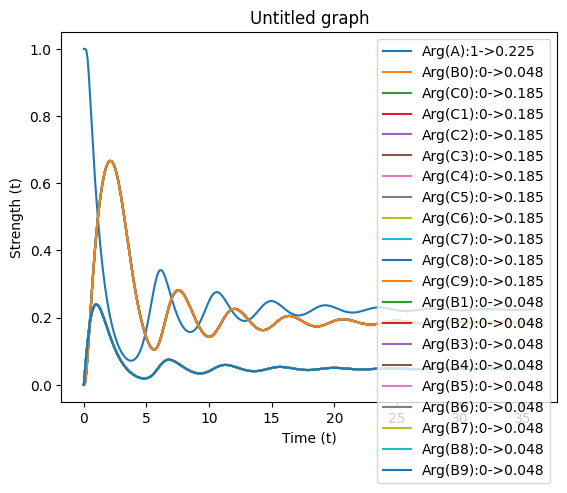

In [8]:
DELTA = 10e-2
EPSILON = 10e-4
N = 10

model = grad.semantics.QuadraticEnergyModel()
BAG = grad.BAG()

a = grad.Argument("A", 1)
b = []
for i in range(N):
    b.append(grad.Argument(f"B{i}", 0))

c = []
for i in range(N):
    c.append(grad.Argument(f"C{i}", 0))

for i in range(N):
    BAG.add_support(a, b[i])
    for j in range(N):
        BAG.add_support(b[i], c[j])
    
    BAG.add_attack(c[i], a)

model.approximator = grad.algorithms.RK4(model)
model.BAG = BAG
result = model.solve(DELTA, EPSILON, True, True)

plot = grad.plotting.strengthplot(model, DELTA, EPSILON)
plot.show()